In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Resources/mbti_randomSample.csv')
data.head()

,Unnamed: 0,type,posts
0,7333,INFJ,"'FDT Yes, you are correct. I don't know who yo..."
1,8403,INFJ,'Almost everything you wrote sounds like me.. ...
2,4562,INFJ,'I suffered with BDD for around 7 years and ev...
3,720,INFJ,'Do you think that there should be sparks on a...
4,3657,INFJ,"'It does sound like anxiety to me, especially ..."


In [101]:
test_data = pd.read_csv('Resources/mbti_1.csv')

In [3]:
#split the posts into arrays 
data['posts_array']= [[x for x in post.split('|||') if len(x)>0] for post in data['posts']]
data.head()

,Unnamed: 0,type,posts,posts_array
0,7333,INFJ,"'FDT Yes, you are correct. I don't know who yo...","['FDT Yes, you are correct. I don't know who y..."
1,8403,INFJ,'Almost everything you wrote sounds like me.. ...,['Almost everything you wrote sounds like me.....
2,4562,INFJ,'I suffered with BDD for around 7 years and ev...,['I suffered with BDD for around 7 years and e...
3,720,INFJ,'Do you think that there should be sparks on a...,['Do you think that there should be sparks on ...
4,3657,INFJ,"'It does sound like anxiety to me, especially ...","['It does sound like anxiety to me, especially..."


In [102]:
test_data['posts_array']= [[x for x in post.split('|||') if len(x)>0] for post in test_data['posts']]

In [4]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [103]:
#create columns for individual letters 
for index, row in test_data.iterrows(): 
    mbti_type = list(row['type'])
    test_data.loc[index,'IorE']=mbti_type[0]
    test_data.loc[index,'SorN']=mbti_type[1]
    test_data.loc[index,'TorF']=mbti_type[2]
    test_data.loc[index,'PorJ']=mbti_type[3]

# Feature: Number of Links per post 

In [28]:
#creating Feature for #of Hyperlinks in posts & array of posts without any hyper links
data['No_links']=""
data['Cnt_hyperlinks']=""
for index, row in data.iterrows():
    temp_a = []
    cnt_hyperlinks = 0
    for i in row['posts_array']: 
        if i.count('http')>0:
            cnt_hyperlinks = cnt_hyperlinks+1
        else: 
            temp_a.append(i)
    data['No_links'][index] = temp_a
    data['Cnt_hyperlinks'][index] = cnt_hyperlinks/len(row['posts_array']) 

    #count hyper links per post 

<ipython-input-28-fd578c353658>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_links'][index] = temp_a
<ipython-input-28-fd578c353658>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cnt_hyperlinks'][index] = cnt_hyperlinks/len(row['posts_array'])


In [104]:
#creating Feature for #of Hyperlinks in posts & array of posts without any hyper links
test_data['No_links']=""
test_data['Cnt_hyperlinks']=""
for index, row in test_data.iterrows():
    temp_a = []
    cnt_hyperlinks = 0
    for i in row['posts_array']: 
        if i.count('http')>0:
            cnt_hyperlinks = cnt_hyperlinks+1
        else: 
            temp_a.append(i)
    test_data['No_links'][index] = temp_a
    test_data['Cnt_hyperlinks'][index] = cnt_hyperlinks/len(row['posts_array']) 

    #count hyper links per post 

In [29]:
data.head()

,Unnamed: 0,type,posts,posts_array,IorE,SorN,TorF,PorJ,No_links,Cnt_hyperlinks
0,7333,INFJ,"'FDT Yes, you are correct. I don't know who yo...","['FDT Yes, you are correct. I don't know who y...",I,N,F,J,"['FDT Yes, you are correct. I don't know who y...",0.0
1,8403,INFJ,'Almost everything you wrote sounds like me.. ...,['Almost everything you wrote sounds like me.....,I,N,F,J,['Almost everything you wrote sounds like me.....,0.02
2,4562,INFJ,'I suffered with BDD for around 7 years and ev...,['I suffered with BDD for around 7 years and e...,I,N,F,J,['I suffered with BDD for around 7 years and e...,0.02
3,720,INFJ,'Do you think that there should be sparks on a...,['Do you think that there should be sparks on ...,I,N,F,J,['Do you think that there should be sparks on ...,0.0
4,3657,INFJ,"'It does sound like anxiety to me, especially ...","['It does sound like anxiety to me, especially...",I,N,F,J,"['It does sound like anxiety to me, especially...",0.06


Text(0.5, 1.0, 'P vs J')

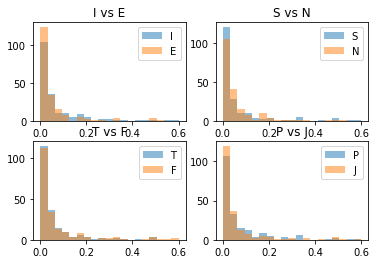

In [30]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,.6,20)

axs[0, 0].hist(data[data['IorE']=='I']['Cnt_hyperlinks'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['Cnt_hyperlinks'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['Cnt_hyperlinks'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['Cnt_hyperlinks'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['Cnt_hyperlinks'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['Cnt_hyperlinks'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper right')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['Cnt_hyperlinks'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['Cnt_hyperlinks'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_title('P vs J')


# Feature: Emoji Used 

In [31]:
import regex as re,emoji,string

In [32]:
def find_emoji(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [33]:
data['emoji_count']=[len(find_emoji(post)) for post in data['posts']]

In [106]:
test_data['emoji_count']=[len(find_emoji(post)) for post in test_data['posts']]

In [34]:
data['emojis']=[find_emoji(post) for post in data['posts']]

In [107]:
test_data['emojis']=[find_emoji(post) for post in test_data['posts']]

In [35]:
data['emoji_count'].value_counts()

0    397
1      3
Name: emoji_count, dtype: int64

# Feature: Number of Posts 

In [36]:
data['num_posts'] = [len(array) for array in data['posts_array']]

In [108]:
test_data['num_posts'] = [len(array) for array in test_data['posts_array']]

Text(0.5, 1.0, 'P vs J')

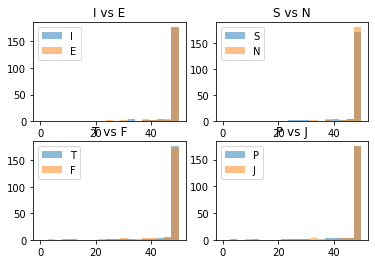

In [37]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,50,20)

axs[0, 0].hist(data[data['IorE']=='I']['num_posts'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['num_posts'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['num_posts'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['num_posts'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['num_posts'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['num_posts'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['num_posts'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['num_posts'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

In [39]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hannah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hannah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hannah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hannah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [41]:
data['clean_posts']=data['posts'].apply(lambda x: clean_text(x))

In [109]:
test_data['clean_posts']=test_data['posts'].apply(lambda x: clean_text(x))

In [42]:
data.head()

,Unnamed: 0,type,posts,posts_array,IorE,SorN,TorF,PorJ,No_links,Cnt_hyperlinks,emoji_count,emojis,num_posts,clean_posts
0,7333,INFJ,"'FDT Yes, you are correct. I don't know who yo...","['FDT Yes, you are correct. I don't know who y...",I,N,F,J,"['FDT Yes, you are correct. I don't know who y...",0.0,0,[],50,"[fdt, yes, correct, dont, know, sorry, overste..."
1,8403,INFJ,'Almost everything you wrote sounds like me.. ...,['Almost everything you wrote sounds like me.....,I,N,F,J,['Almost everything you wrote sounds like me.....,0.02,0,[],50,"[almost, everything, wrote, sounds, like, sadt..."
2,4562,INFJ,'I suffered with BDD for around 7 years and ev...,['I suffered with BDD for around 7 years and e...,I,N,F,J,['I suffered with BDD for around 7 years and e...,0.02,0,[],50,"[suffered, bdd, around, years, even, though, i..."
3,720,INFJ,'Do you think that there should be sparks on a...,['Do you think that there should be sparks on ...,I,N,F,J,['Do you think that there should be sparks on ...,0.0,0,[],50,"[think, sparks, first, date, thats, requiremen..."
4,3657,INFJ,"'It does sound like anxiety to me, especially ...","['It does sound like anxiety to me, especially...",I,N,F,J,"['It does sound like anxiety to me, especially...",0.06,0,[],50,"[sound, like, anxiety, especially, since, deve..."


In [43]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
data['clean_posts'] = data['clean_posts'].apply(lambda x: lem(x))

In [110]:
test_data['clean_posts'] = test_data['clean_posts'].apply(lambda x: lem(x))

In [44]:
data['clean_posts']=[str(thing) for thing in data['clean_posts']]

In [111]:
test_data['clean_posts']=[str(thing) for thing in test_data['clean_posts']]

In [45]:
sentiment = []
for i in range(len(data)):
    blob = TextBlob(data['clean_posts'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
data['sentiment']=sentiment

In [112]:
sentiment = []
for i in range(len(test_data)):
    blob = TextBlob(test_data['clean_posts'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
test_data['sentiment']=sentiment

Text(0.5, 1.0, 'P vs J')

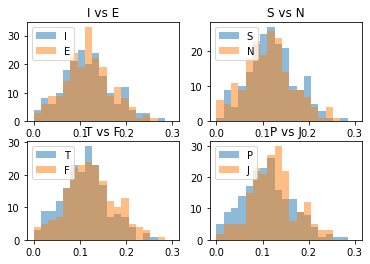

In [46]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,.3,20)

axs[0, 0].hist(data[data['IorE']=='I']['sentiment'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['sentiment'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['sentiment'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['sentiment'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['sentiment'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['sentiment'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['sentiment'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['sentiment'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv1 = CountVectorizer()

In [67]:
x_traincv = cv1.fit_transform(data['clean_posts'])

In [68]:
a= x_traincv.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
cv2 = CountVectorizer()
x_test = cv2.fit_transform(test_data['clean_posts'])

In [114]:
X_test = pd.concat([test_data[['Cnt_hyperlinks','sentiment', 'emoji_count']], pd.DataFrame(x_test.toarray())], axis=1) 

MemoryError: Unable to allocate 18.3 GiB for an array with shape (8675, 283429) and data type int64

In [96]:
X_count_feat = pd.concat([data[['Cnt_hyperlinks','sentiment', 'emoji_count']], pd.DataFrame(X_count.toarray())], axis=1) 


In [94]:
X_count_feat.head()

,No_links,Cnt_hyperlinks,sentiment,emoji_count,0,1,2,3,4,5,...,37081,37082,37083,37084,37085,37086,37087,37088,37089,37090
0,"['FDT Yes, you are correct. I don't know who y...",0.0,0.083190,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,['Almost everything you wrote sounds like me.....,0.02,0.137759,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,['I suffered with BDD for around 7 years and e...,0.02,0.069872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,['Do you think that there should be sparks on ...,0.0,0.077484,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"['It does sound like anxiety to me, especially...",0.06,0.134456,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import StandardScaler

In [97]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_count_feat)

StandardScaler()

In [ ]:
# Scale the data
scaler2 = StandardScaler()
scaler2.fit(X_test)

In [ ]:
x_train_scaled = scaler.transform(X_count_feat)

In [ ]:
x_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [100]:
classifier.fit(x_train_scaled, data['IorE'])

LogisticRegression()

In [ ]:
classifier.score(X_test, test_data['IorE'])

In [74]:
data.head()

,Unnamed: 0,type,posts,posts_array,IorE,SorN,TorF,PorJ,No_links,Cnt_hyperlinks,emoji_count,emojis,num_posts,clean_posts,sentiment
0,7333,INFJ,"'FDT Yes, you are correct. I don't know who yo...","['FDT Yes, you are correct. I don't know who y...",I,N,F,J,"['FDT Yes, you are correct. I don't know who y...",0.0,0,[],50,"['fdt', 'yes', 'correct', 'dont', 'know', 'sor...",0.083190
1,8403,INFJ,'Almost everything you wrote sounds like me.. ...,['Almost everything you wrote sounds like me.....,I,N,F,J,['Almost everything you wrote sounds like me.....,0.02,0,[],50,"['almost', 'everything', 'write', 'sound', 'li...",0.137759
2,4562,INFJ,'I suffered with BDD for around 7 years and ev...,['I suffered with BDD for around 7 years and e...,I,N,F,J,['I suffered with BDD for around 7 years and e...,0.02,0,[],50,"['suffer', 'bdd', 'around', 'year', 'even', 't...",0.069872
3,720,INFJ,'Do you think that there should be sparks on a...,['Do you think that there should be sparks on ...,I,N,F,J,['Do you think that there should be sparks on ...,0.0,0,[],50,"['think', 'spark', 'first', 'date', 'thats', '...",0.077484
4,3657,INFJ,"'It does sound like anxiety to me, especially ...","['It does sound like anxiety to me, especially...",I,N,F,J,"['It does sound like anxiety to me, especially...",0.06,0,[],50,"['sound', 'like', 'anxiety', 'especially', 'si...",0.134456


In [75]:
from sklearn.linear_model import LogisticRegression

In [3]:
data['num_of_posts']= [len([x for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [4]:
data.head()

,Unnamed: 0,type,posts,num_of_posts
0,5150,INFJ,'Until my mid-twenties I couldn't care less wh...,50
1,4661,INFJ,'http://personalitycafe.com/attachments/infj-f...,50
2,3397,INFJ,"Definitely conflict, too. Unreasonable loudnes...",50
3,6839,INFJ,"'Last night, was racing people on my old schoo...",50
4,5044,INFJ,'Looks like the preliminary results from the p...,50


In [5]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [6]:
data['IorE'].value_counts()

I    200
E    200
Name: IorE, dtype: int64

In [7]:
data['SorN'].value_counts()

N    200
S    200
Name: SorN, dtype: int64

In [8]:
data['TorF'].value_counts()

F    200
T    200
Name: TorF, dtype: int64

In [9]:
data['PorJ'].value_counts()

P    200
J    200
Name: PorJ, dtype: int64

In [10]:
data = data[['type','IorE','SorN','TorF','PorJ','posts','num_of_posts']]

In [11]:
data['posts'][4].split('|||')

["'Looks like the preliminary results from the poll confirm my little haphazard theory thus far, especially in regards to the possible causality of the mistyping.  May mean my theory will eventually be...",
 'Hello everyone,  I am working on a personal theory of sorts related to male INFJs and our possible tendency to mistype early on when we first learn about MBTI typologies.  For example, I personally...',
 "It's been quite a while since I posted, but I'm thinking it might be time to make a come back.  Figured this wouldn't be the worst place to get started.  So hello, again.  Here are two random pics...",
 "Understated, yet refined.  Well-kempt, yet playfully casual.  Projecting a sense of presence, confidence, and stature which cannot be denied, yet does not cry out immaturely for attention.  It's...",
 "Well, I mean, when I someday rule the world, I totally plan to be one of those benevolent dictators.  You know...the tyrant with a heart of gold type of approach.  What's so dark o

# Evaluating Number of Posts as a Feature 

Number of Posts is not a good feature to use - majority of the population is posting more than 45 posts 

Text(0.5, 1.0, 'P vs J')

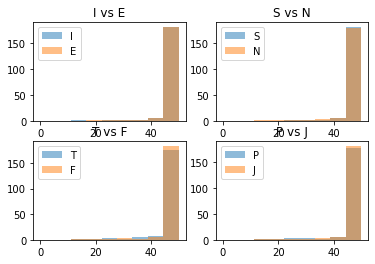

In [12]:
bins = np.linspace(0,50,10)
fig, axs = plt.subplots(2,2) 
axs[0, 0].hist(data[data['IorE']=='I']['num_of_posts'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['num_of_posts'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['num_of_posts'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['num_of_posts'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['num_of_posts'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['num_of_posts'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['num_of_posts'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['num_of_posts'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


# Evaluating Youtube references as a Feature 

In [13]:
data['ref_YT']= [post.count('youtube') for post in data['posts']]

Text(0.5, 1.0, 'P vs J')

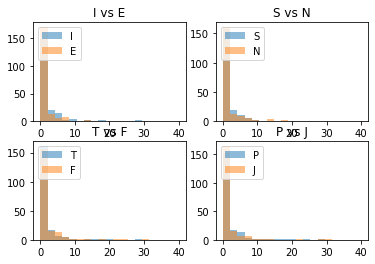

In [14]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['ref_YT'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['ref_YT'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['ref_YT'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['ref_YT'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['ref_YT'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['ref_YT'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['ref_YT'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['ref_YT'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


In [15]:
data['countPunct']= [len(re.findall('[?!]',post)) for post in data['posts']]

In [16]:
data['countPunct']= [np.mean([len(re.findall('[?!]',post)) for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [17]:
data['countQM']= [np.mean([post.count('?') for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [18]:
re.findall('[?!.]',data['posts'][4])

['.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '!',
 '!',
 '.',
 '.',
 '.',
 '.',
 '!',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.'

Text(0.5, 1.0, 'P vs J')

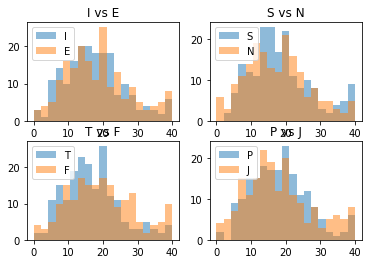

In [19]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countPunct'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countPunct'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countPunct'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countPunct'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countPunct'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countPunct'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countPunct'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countPunct'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


Text(0.5, 1.0, 'P vs J')

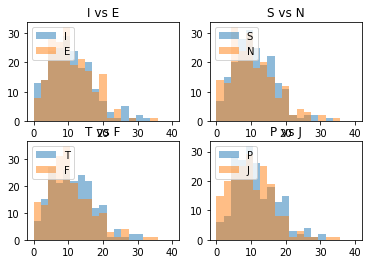

In [20]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countQM'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countQM'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countQM'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countQM'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countQM'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countQM'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countQM'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countQM'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')

In [21]:
data['countLOL']= [post.count('lol') for post in data['posts']]

In [22]:
data.head()

,type,IorE,SorN,TorF,PorJ,posts,num_of_posts,ref_YT,countPunct,countQM,countLOL
0,INFJ,I,N,F,J,'Until my mid-twenties I couldn't care less wh...,50,0,25.0,9.0,0
1,INFJ,I,N,F,J,'http://personalitycafe.com/attachments/infj-f...,50,1,17.0,7.0,0
2,INFJ,I,N,F,J,"Definitely conflict, too. Unreasonable loudnes...",50,2,23.0,20.0,0
3,INFJ,I,N,F,J,"'Last night, was racing people on my old schoo...",50,0,3.0,2.0,0
4,INFJ,I,N,F,J,'Looks like the preliminary results from the p...,50,0,23.0,2.0,1


Text(0.5, 1.0, 'P vs J')

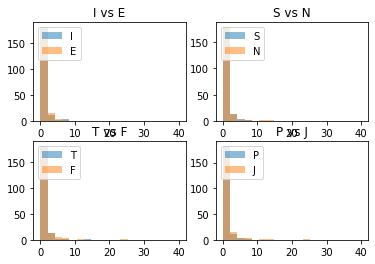

In [23]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countLOL'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countLOL'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countLOL'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countLOL'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countLOL'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countLOL'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countLOL'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countLOL'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')